# 2015 Computational Social Science Workshop


# Day 1 - Introduction to `python` - Part 3 / 3
with **Jongbin Jung** (jongbin at stanford.edu)
- PhD student. Decision analysis, MS&E


All material for days 1 (intro to `python`) and 2 (web scraping with `python`) publicly available at https://github.com/jongbinjung/css-python-workshop

## 3. Jupyter (aka iPython Notebook) and more ... - 2 of 2
- (assuming we made it this far!) let's take a look at some simple plotting and machine learning with `python`

First, make sure our data is loaded:

In [1]:
import pandas

data_src = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pandas.read_csv(data_src, sep=';')

And let's add the `'quality_str'` column too, since that's what we're going to use as labels when trying some machine learning.

In [2]:
def quality_to_str(qual):
    if qual > 7:
        return 'good'
    elif qual > 4:
        return 'not bad'
    else:
        return 'bad'
    
wine_data['quality_str'] = wine_data.loc[:, 'quality'].apply(quality_to_str)

## Plotting (with `matplotlib`)
Much of your basic plotting needs can be satisfied with the `plot()` method if `pandas` `DataFrame`s. The `plot()` method uses the `matplotlib` module (also included with Anaconda), so we need to import that first:

In [3]:
# ipython command to show plots in an ipython notebook
%matplotlib inline  

import matplotlib
import matplotlib.pyplot as plt

Most basic plots can be achieved by specifying `x`, `y` (when appropriate), and the `kind` of plot as arguments of the `plot()` method. Available `kind`s are:
- line : line plot
- bar : vertical bar plot
- barh : horizontal bar plot
- kde/density : Kernel Density Estimation plot
- area : area plot
- scatter : scatter plot
- hexbin : hexbin plot

`x` and `y` can be specified by column label. For example, ploting the residual sugar ($x$) against alcohol ($y$) as a scatter plot is as simple as:

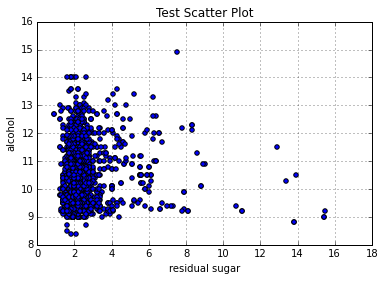

In [4]:
plot = wine_data.plot(x='residual sugar', y='alcohol', kind='scatter', title='Test Scatter Plot')

Use summarized `DataFrame`s to plot summaries.

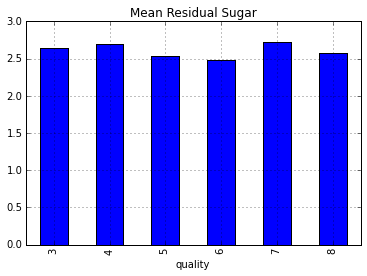

In [5]:
plot = wine_data.groupby('quality').mean().loc[:, 'residual sugar'].plot(kind='bar', title='Mean Residual Sugar')

## Machine learning tools (with `scikit-learn`)
[`scikit-learn`](http://scikit-learn.org) is another useful package that provides a whole suite of machine learning algorithms to use with your data.

The module name is `sklearn`, but you'll want to `import` just the submodules you intend to use, since `scikit-learn` provides so many models/methods. 

Assuming we've actually made it this far, for this part of the workshop I think it will be more helpful (and perhaps encouraging?) if I walk you through the general workflow of getting stuff done with `python`, which usually involves as much Googling as coding. 

Let me try and build a simple example using `RandomForestClassifier`s. (But the process for using other models is quite similar.)

First, lets randomly split our `wine_data` 50:50. We'll use the first 50% of data to train a Random Forest, and use the trained classifier to predict the quality of the remaining 50%. Such spliting of datasets is standard practice, and can be achieved using `numpy`'s random number generator:

In [6]:
import numpy as np
# generate a list of random numbers, as many as the length of wine_data, to use as a mask
msk = np.random.rand(len(wine_data))

# convert the msk to a list of True or False, where 80% of the list will be True
msk = msk < 0.5

# the columns of wine_data that match the True values of msk are assigned to the training set
train_data = wine_data.loc[msk]
test_data = wine_data.loc[~msk]

Next, assuming we don't know anything other than the fact that we want to use `python` to build a Random Forest classifier, we Google something like 
> `python random forest`

which will hopefully lead to the documentation for `scikit-learn`'s `RandomForestClassifier`
<img src=img/google_python_rf.png width=500>

The docs tell us there is a `class` called `RandomForestClassifier` in the `sklearn.ensemble` package, so importing that is probably a good starting point:

In [7]:
# import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In a Jupyter `code` cell, type `RandomForestClassifier` and hit <kbd>Shift</kbd>+<kbd>Tab</kbd> to see the docs. It looks like all the arguments have default values set up, so let's just instantiate a `RandomForestClassifier` for now. (note: using default values without prior knowledge/research of specific method characteristics is generally frowned upon; but we'll stick to the defaults for the purpose of our workshop)

In [8]:
rfc = RandomForestClassifier()  # instantiate a RandomForestClassifier

That seems to have worked. Good. 

Now, my best guess is that the `RandomForestClassifier` will have some sort of method that takes in a set of features (or predictors, independent variables, etc. depending on your background) and labels (true values, dependent variable, etc.) and actually fits a random forest to it. Type `rfc.` and hit <kbd>Tab</kbd> in a `code` cell to get a list of possible attributes/methods. The `fit` method looks promising! Let's read the docs (select `fit` with <kbd>Enter</kbd> and then <kbd>Shift</kbd>+<kbd>Tab</kbd> for docs)

The docs reveal that the `fit(X, y)` method is exactly what we're looking for, where `X` is 
>`array-like of shape = [n_samples, n_features]`

and `y` is
>`The target values (class labels in classification, real numbers in regression).`

Setting `y` feels like it's going to be easy, since we already have a column that we intend to use as the label('`quality_str`')! So let's set this up first. We'll call the variable `'labels_train'` and `'labels_test'`:

In [9]:
# 'pop' is much like 'drop', but has the added benefit of returning
#    our column of choice, before removing it from the DataFrame
labels_train = train_data.pop('quality_str')
labels_test = test_data.pop('quality_str')

Now we want to set `X`, the predictors to use in the `fit()` method. But taking a look at our `train_data` (with the `'quality_str'` column popped)

In [10]:
train_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
8,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,5


...notice there's still a `'quality'` column, which we don't want to use as a predictor. So, lets get rid of it 

In [11]:
train_data = train_data.drop('quality', axis=1)
test_data = test_data.drop('quality', axis=1)

train_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4
8,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5


That looks better! Now, let's try fitting our `RandomForestClassifier`:

In [12]:
rfc.fit(train_data, labels_train)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)

That seems to have worked! Now, using the same approach, we can find the `predict(X)` method, which only requires the predictors of the dataset we want to predict classes for:

In [13]:
predictions = rfc.predict(test_data)

Note that the `predictions` is simply a list of what the fitted `rfc` predicts the `quality_str` of each example in the test data to be. We can compare this to the corresponding true values (`labels_train`) which we popped earlier to measure performance:

In [14]:
predictions == labels_test

0      True
1      True
3      True
6      True
7      True
14     True
18    False
20     True
21     True
22     True
25     True
27     True
28     True
29     True
36     True
...
1574    True
1578    True
1579    True
1580    True
1581    True
1583    True
1584    True
1588    True
1589    True
1590    True
1591    True
1592    True
1593    True
1595    True
1596    True
Name: quality_str, Length: 810, dtype: bool

That gave us a long list of `True`s and `False`s. But remember, `True` and `False` correspond to 1 and 0, mathematically, so perhaps we can get away with a simple `sum()` over the above results?

In [15]:
sum(predictions == labels_test)

767

Terrific. This tells us that our `rfc` predicted 750 examples correctly. The proportion of 750 out of the total examples would precisely be the *accuracy* of our classifier:

In [16]:
sum(predictions == labels_test)/len(predictions)

0

Now that doesn't look right. Back to the very first note on `python`. Both sides of the division operator (/) are integers, so it must be that `python` is returning a (rounded) integer. (I told you this happens more often than you'd imagine!). To fix this, we need to convert either the nominator or denominator to a `float`, before `python` does the division:

In [17]:
sum(predictions == labels_test)/float(len(predictions))

0.94691358024691363

Nice. Looks like we have an accuracy of 94.82%! Not bad for default values. (Actually, so good that I'm even wondering if I made a mistake somewhere ...)

## Exercise 6.
I guess at this point, the only exercise left is to go back to your *real* projects and continue to get stuff done. I just hope that today's workshop was at least entertaining, if not helpful in getting your stuff done. 

Thank you, and good luck!